# CNN

Redes neuronales convolusionales

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# Red neuronal secuencial
from tensorflow.keras.models import Sequential

# Capa completamente conectada
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D

# Optimizador
from tensorflow.keras.optimizers import Adam


In [2]:
# Asegurar que los resultados sean reproducibles

import tensorflow as tf

np.random.seed(1234)
tf.random.set_seed(1234)

In [3]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

In [4]:
def mostrar_num(in_data):
  """
  Generar un grafico que muestra un registro del set de datos
  Para ello, convierte el array de una dimension en una matriz de 28x28
  """
  matriz = np.array(in_data.values)
  plt.imshow(matriz.reshape(28,28))

0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: 200, dtype: int64


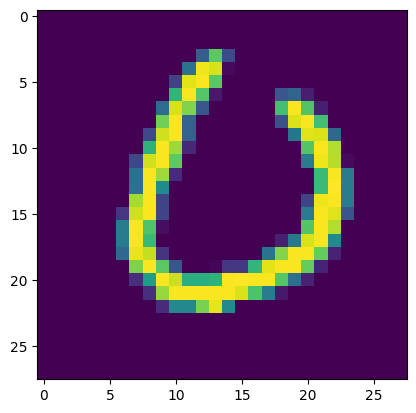

In [5]:
registro = 200
print(y_train.iloc[registro])
mostrar_num(X_train.iloc[registro])

In [6]:
print(X_train.shape)

(7500, 784)


In [7]:
# crear red neuronal
## Imagenes que aceptan 28x28 pixeles
nn_squencial = Sequential(
    [
      layers.Input(784), ## capa de entrada
      layers.Dense(256, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(10, activation='softmax'), ## capa de salida
    ]
)

In [8]:
# compilacion de la red neuronal
nn_squencial.compile(
    loss='categorical_crossentropy', ## funcion de perdida, calcular errores
    optimizer=Adam(learning_rate=0.01), ## cambio de repeticion a repeticion
    metrics=['accuracy'] ## precision
)

In [9]:
# entrenamiento de modelo
historial = nn_squencial.fit(
    X_train.values,
    y_train.values,
    epochs=20,
    validation_split=0.1 # divide datos en train / test
)

Epoch 1/20
211/211 [==============================] - 9s 26ms/step - loss: 8.6590 - accuracy: 0.6637 - val_loss: 0.5823 - val_accuracy: 0.8293
Epoch 2/20
211/211 [==============================] - 4s 20ms/step - loss: 0.6587 - accuracy: 0.8219 - val_loss: 0.5540 - val_accuracy: 0.8347
Epoch 3/20
211/211 [==============================] - 6s 28ms/step - loss: 0.5692 - accuracy: 0.8461 - val_loss: 0.5172 - val_accuracy: 0.8760
Epoch 4/20
211/211 [==============================] - 4s 19ms/step - loss: 0.4503 - accuracy: 0.8834 - val_loss: 0.4156 - val_accuracy: 0.8947
Epoch 5/20
211/211 [==============================] - 4s 19ms/step - loss: 0.3751 - accuracy: 0.8970 - val_loss: 0.4802 - val_accuracy: 0.8613
Epoch 6/20
211/211 [==============================] - 4s 21ms/step - loss: 0.3382 - accuracy: 0.9064 - val_loss: 0.4179 - val_accuracy: 0.8853
Epoch 7/20
211/211 [==============================] - 4s 19ms/step - loss: 0.4036 - accuracy: 0.8997 - val_loss: 0.5420 - val_accuracy: 0.8600

# Redes convolucionales (2D y 3D)

* Dos etapas
  * Feature learning / parte convolucional
    * Las redes no estan del todo conectadas
  * Classfication
    * Redes unidas / parte completamente conectada

In [10]:
# Red neuronal convolucional
conv_nn = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)), ## dimension, dimension, columna
        # convolucional
        layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)), ## elementos mas importantes de la capa
        layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        # aplanada
        layers.Flatten(), ## convierte las capas a una sola dimension
        layers.Dropout(0.5), ## filtrar las neuronas con bastante informacion
        layers.Dense(10, activation='softmax'),
    ]
)

In [11]:
conv_nn.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

In [12]:
# convertir el set de datos X a 2D
new_x_train = X_train.values.reshape(-1, 28, 28)

In [15]:
# Mostrar datos del set en 2D
new_x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [14]:
# Entrenar red nauronal convulsional
conv_nn.fit(
    new_x_train,
    y_train,
    batch_size=128,
    epochs=10, ## repeticiones de entrenamiento
    validation_split=0.1 ## division de datos train/test
)

Epoch 1/10
53/53 [==============================] - 11s 178ms/step - loss: 5.1217 - accuracy: 0.5927 - val_loss: 0.3210 - val_accuracy: 0.8920
Epoch 2/10
53/53 [==============================] - 9s 167ms/step - loss: 0.5744 - accuracy: 0.8225 - val_loss: 0.1967 - val_accuracy: 0.9413
Epoch 3/10
53/53 [==============================] - 6s 104ms/step - loss: 0.4254 - accuracy: 0.8658 - val_loss: 0.1426 - val_accuracy: 0.9587
Epoch 4/10
53/53 [==============================] - 7s 131ms/step - loss: 0.3500 - accuracy: 0.8990 - val_loss: 0.1231 - val_accuracy: 0.9600
Epoch 5/10
53/53 [==============================] - 6s 105ms/step - loss: 0.3211 - accuracy: 0.9039 - val_loss: 0.1279 - val_accuracy: 0.9587
Epoch 6/10
53/53 [==============================] - 7s 128ms/step - loss: 0.3009 - accuracy: 0.9108 - val_loss: 0.1341 - val_accuracy: 0.9533
Epoch 7/10
53/53 [==============================] - 6s 117ms/step - loss: 0.2714 - accuracy: 0.9150 - val_loss: 0.1105 - val_accuracy: 0.9560
Epoch

In [16]:
# Guardar red neuronal convolucional
conv_nn.save('conv_nn.h5')